# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning: invalid escape sequence '\$'
<>:55: SyntaxWarning: invalid escape sequence '\$'
C:\Users\madsh\AppData\Local\Temp\ipykernel_17192\1842324635.py:55: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\madsh\AppData\Local\Temp\ipykernel_17192\1842324635.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


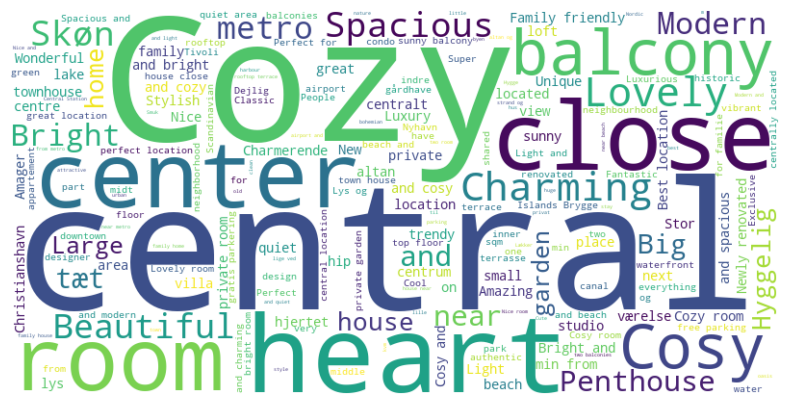

In [2]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

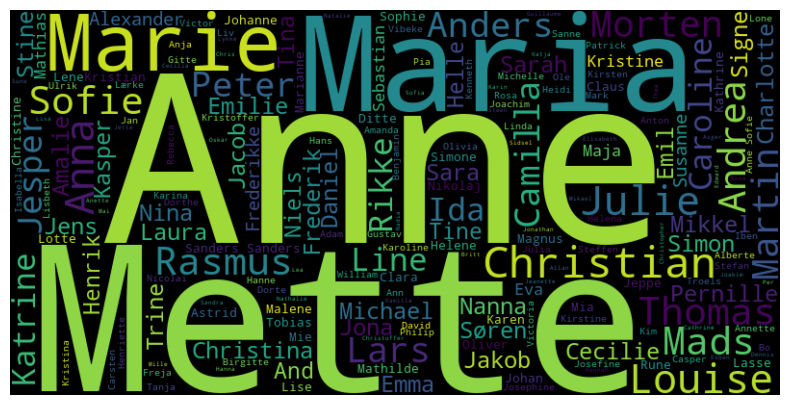

In [3]:
# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['ApartmentInCopenhagen','This','Into','Denmark','Place','Rent','A','Place','Forenom','Og']

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['host_name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="black", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [4]:

# - Library used for creating maps
import folium as folium

# * Get the median of both latitude and longitude for centering the map on Copenhagen
center_lat, center_lon = data_filtered["latitude"].median(), data_filtered["longitude"].median()

# # Create the map
copenhagen_map = folium.Map(location=[center_lat,center_lon],zoom_start=10)

# * Loop through all the coordinates and add a marker to the map.
for idx, row in data_filtered.iterrows():
    folium.CircleMarker([row['latitude'],row['longitude']],
                        radius=1,
                        color="red"
                        ).add_to(copenhagen_map)

path = "./map.html"

# # Save the map to the path.
copenhagen_map.save(path)


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

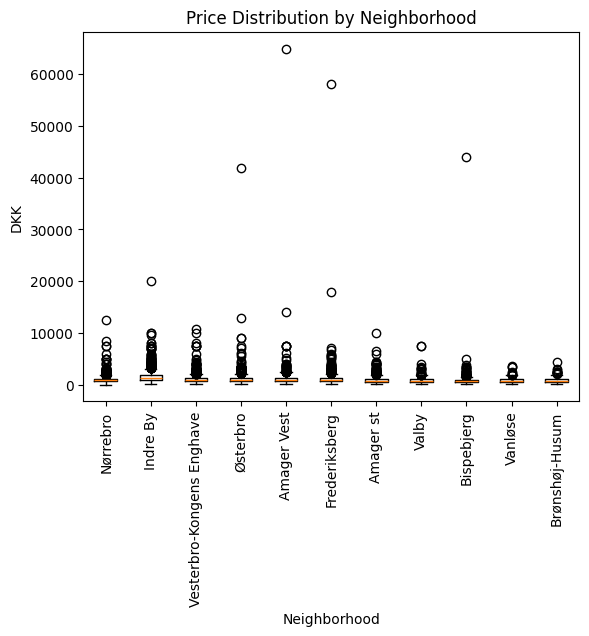

In [203]:

# - Fetch the neighborhood and price columns from the
neighborhoods = data_filtered['neighbourhood_cleansed']
prices = data_filtered['price']

# * Initialize an empty dictionary
neighborhood_prices = {}

# * Loop through each neighborhood and price
for neighborhood, price in zip(neighborhoods, prices):
    # If the neighborhood doesn't exist in the dictionary, add it with the current price in a new list
    if neighborhood not in neighborhood_prices:
        neighborhood_prices[neighborhood] = [price]
    # If the neighborhood exists, append the current price to its list
    else:
        neighborhood_prices[neighborhood].append(price)

# * Extract the lists of prices for each neighborhood in the dictionary
price_lists = list(neighborhood_prices.values())

# * Create a boxplot for price data
plt.boxplot(price_lists)

# *  Extract nieghborhood names for x-ticks
neighborhood_names = list(neighborhood_prices.keys())

# * Set points on the x-axis for each neighborhood
plt.xticks(range(1,len(neighborhood_names)+1),neighborhood_names,rotation=90)

# * Label the axises and diagram.
plt.xlabel('Neighborhood')
plt.ylabel('DKK')
plt.title('Price Distribution by Neighborhood')

# - Show the plot with adjustments
plt.show()


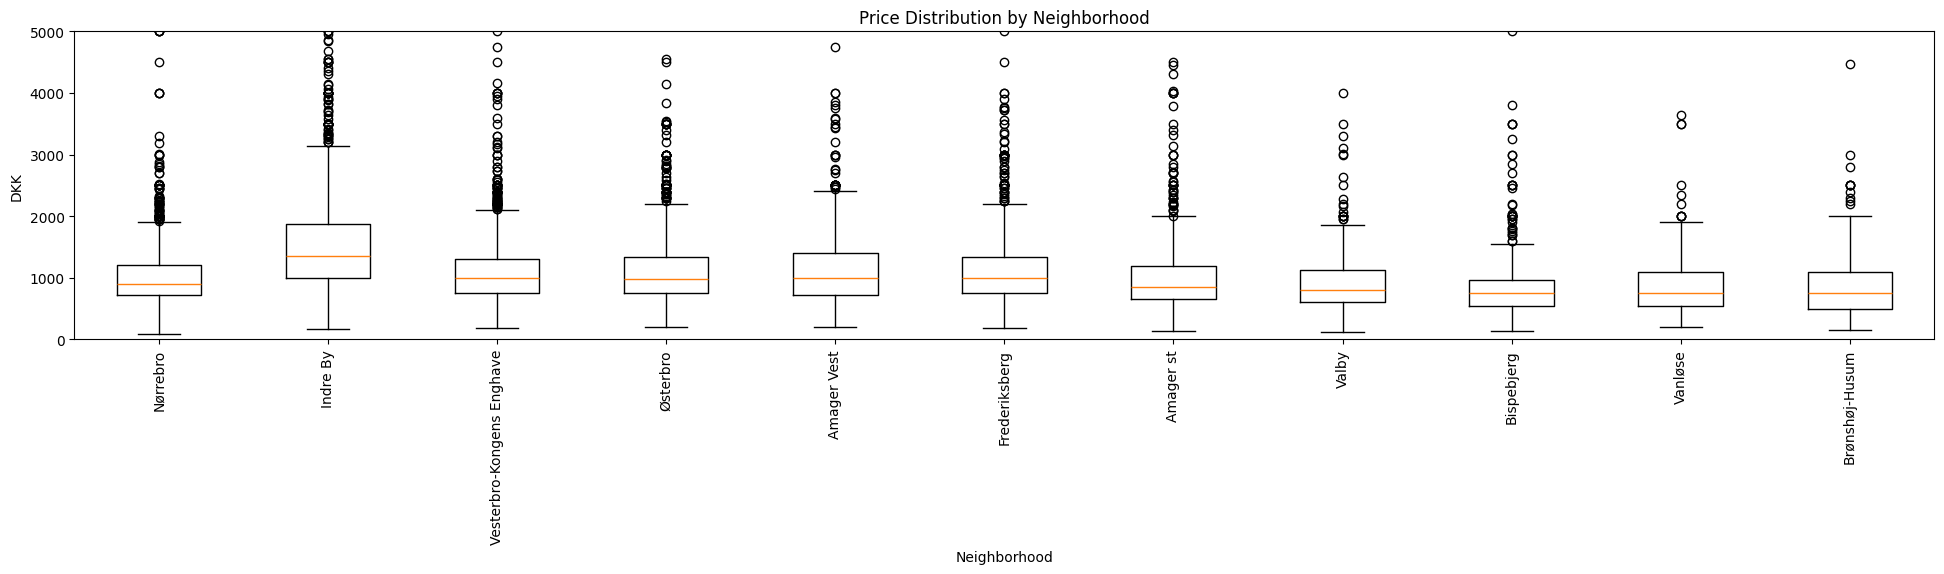

In [202]:
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(4)

# # NUMBER ONE
plt.boxplot(price_lists)
### set label
# * Label the axises and diagram.
plt.xlabel('Neighborhood')
plt.ylabel('DKK')
plt.title('Price Distribution by Neighborhood')

#### Set y min and max
plt.ylim(0, 5000)
# * Set points on the x-axis for each neighborhood
plt.xticks(range(1,len(neighborhood_names)+1),neighborhood_names,rotation=90)

plt.show()


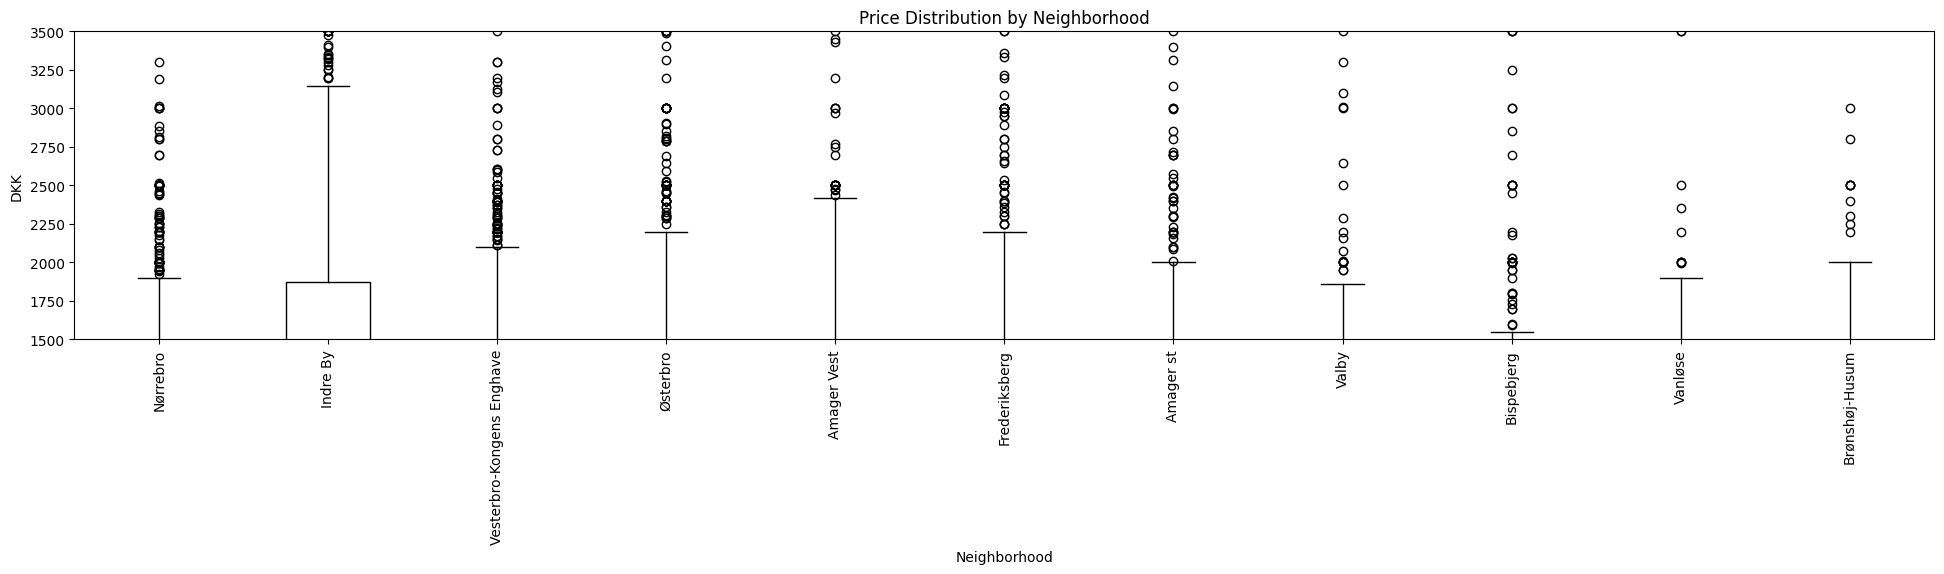

In [204]:
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(4)

# # NUMBER ONE
plt.boxplot(price_lists)
### set label
# * Label the axises and diagram.
plt.xlabel('Neighborhood')
plt.ylabel('DKK')
plt.title('Price Distribution by Neighborhood')

#### Set y min and max
plt.ylim(1500, 3500)
# * Set points on the x-axis for each neighborhood
plt.xticks(range(1,len(neighborhood_names)+1),neighborhood_names,rotation=90)

plt.show()


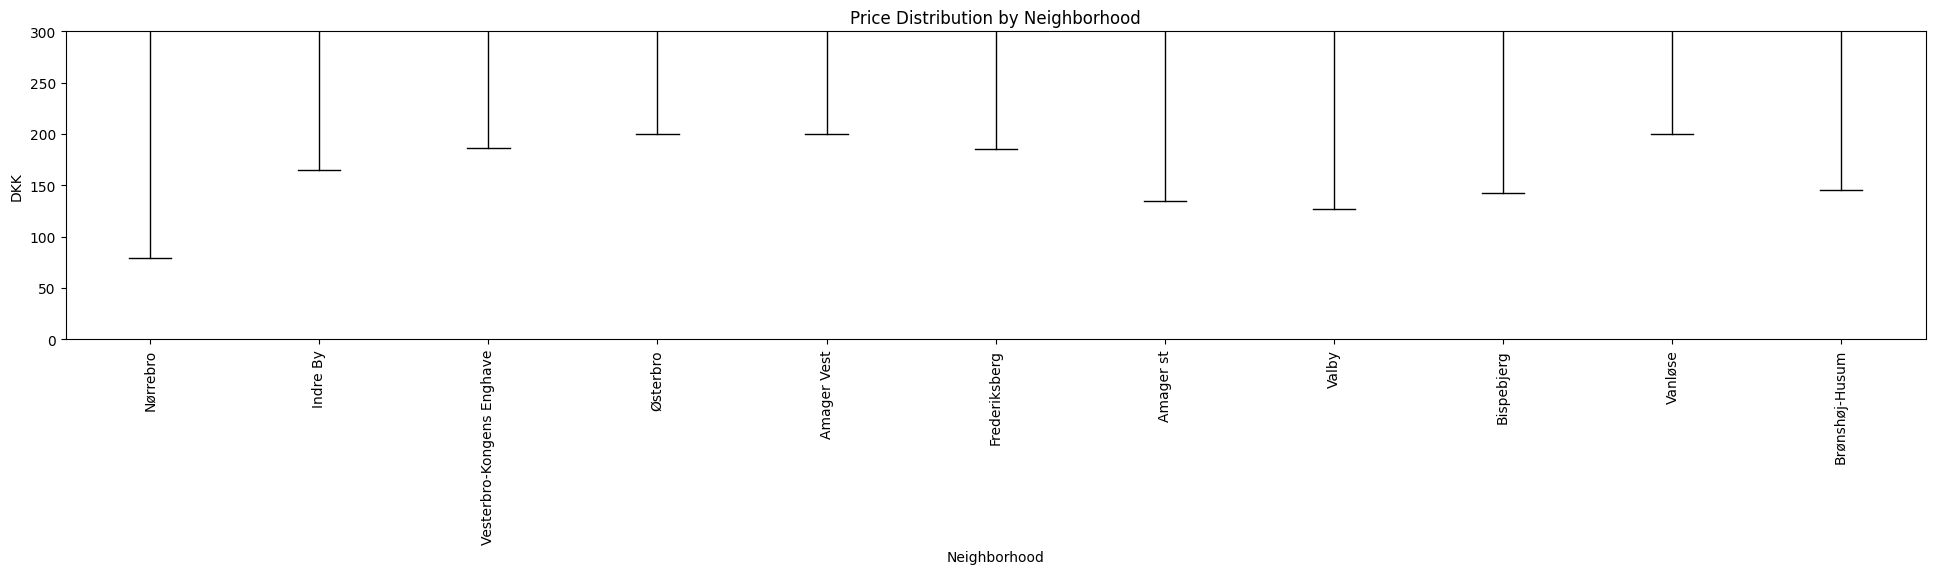

In [205]:
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(4)

# # NUMBER ONE
plt.boxplot(price_lists)
### set label
# * Label the axises and diagram.
plt.xlabel('Neighborhood')
plt.ylabel('DKK')
plt.title('Price Distribution by Neighborhood')

#### Set y min and max
plt.ylim(0, 300)
# * Set points on the x-axis for each neighborhood
plt.xticks(range(1,len(neighborhood_names)+1),neighborhood_names,rotation=90)

plt.show()


By looking at the **3** different diagrams, we can infer the following:
- There are variations in the median listing price among different neighborhoods.
- Some neighborhoods have a wide range of prices (large whiskers), while others have a more concentrated range of listing prices (short whiskers).
- There are outliers in most neighborhoods, which could be either very luxurious or very basic listings.
- The scales on the y-axes are different for each plot, indicating they might represent different types of listings (e.g., entire homes/apartments, private rooms, shared rooms)
- That listings closer to ``Indre By`` are more expensive in general, than those futher away.

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [180]:

# - Data preparation

# * Load the data

# * Filter the relevant columns
neighborhood_room_type = data_filtered[['room_type', 'neighbourhood_cleansed']] # * Room type and neighborhood
unique_neighborhoods = data_filtered['neighbourhood_cleansed'].unique() # * List of unique neighborhoods

# ? Loop through each neighborhood and room type to calculate the statistics
for neighborhood in unique_neighborhoods:
    
    # * Create a list to store data for each room type in the neighborhood
    data = []

    # * Get the room types for the current neighborhood
    current_neighborhood_data = neighborhood_room_type[neighborhood_room_type['neighbourhood_cleansed'] == neighborhood]

    # ? Loop through each room type in the neighborhood
    for room_type in current_neighborhood_data['room_type'].unique():

        # * Filter the data for the current neighborhood and room type
        room_type_data = data_filtered[(data_filtered['neighbourhood_cleansed'] == neighborhood) & (data_filtered['room_type'] == room_type)]
        
        # # Create a dictionary to store the statistics for the current room type
        room_type_dict = {
            "Room Type": room_type,
            "Amount": len(room_type_data),
            "Avg.": room_type_data['review_scores_rating'].mean(),
            "Median ": room_type_data['review_scores_rating'].median(),
            "Mode" : room_type_data['review_scores_rating'].mode()[0],
            "Variance" : room_type_data['review_scores_rating'].var(),
            "Min.": room_type_data['review_scores_rating'].min(),
            "Q1": room_type_data['review_scores_rating'].quantile(0.25),
            "Q3": room_type_data['review_scores_rating'].quantile(0.75),
            "Max.": room_type_data['review_scores_rating'].max(),
        }

        # * Append the dictionary to the list
        data.append(room_type_dict)
    
    # # Convert the list of dictionaries into a DataFrame
    stats_df = pd.DataFrame(data)
    
    # - Format the DataFrame
    stats_df['Avg.'] = stats_df['Avg.'].apply(lambda x: f'{x:.2f}')
    stats_df['Median '] = stats_df['Median '].apply(lambda x: f'{x:.2f}')
    stats_df['Variance'] = stats_df['Variance'].apply(lambda x: f'{x:.2f}')
    stats_df['Q1'] = stats_df['Q1'].apply(lambda x: f'{x:.2f}')
    stats_df['Q3'] = stats_df['Q3'].apply(lambda x: f'{x:.2f}')
    stats_df['Min.'] = stats_df['Min.'].apply(lambda x: f'{x:.2f}')
    stats_df['Max.'] = stats_df['Max.'].apply(lambda x: f'{x:.2f}')
    stats_df['Mode'] = stats_df['Mode'].apply(lambda x: f'{x:.2f}')

    # * Add a title to the DataFrame
    stats_df = stats_df.style.set_caption(f"Ratings for {neighborhood}")

    # * Display the DataFrame
    display(stats_df.hide())

Room Type,Amount,Avg.,Median,Mode,Variance,Min.,Q1,Q3,Max.
Entire home/apt,1889,4.81,4.88,5.00,0.07,2.50,4.71,5.00,5.00
Private room,165,4.80,4.86,5.00,0.05,3.50,4.67,5.00,5.00
Shared room,3,4.76,4.70,4.62,0.03,4.62,4.66,4.83,4.97


Room Type,Amount,Avg.,Median,Mode,Variance,Min.,Q1,Q3,Max.
Entire home/apt,1702,4.78,4.86,5.00,0.08,2.00,4.67,5.00,5.00
Private room,128,4.70,4.81,5.00,0.15,3.00,4.62,4.96,5.00
Hotel room,10,4.42,4.40,3.50,0.16,3.50,4.33,4.61,4.93
Shared room,4,4.53,4.47,4.28,0.07,4.28,4.35,4.66,4.89


Room Type,Amount,Avg.,Median,Mode,Variance,Min.,Q1,Q3,Max.
Entire home/apt,1811,4.83,4.92,5.00,0.06,3.00,4.75,5.00,5.00
Private room,221,4.79,4.86,5.00,0.06,3.00,4.67,5.00,5.00
Shared room,2,4.92,4.92,4.85,0.01,4.85,4.89,4.96,5.00


Room Type,Amount,Avg.,Median,Mode,Variance,Min.,Q1,Q3,Max.
Entire home/apt,1174,4.81,4.92,5.00,0.09,2.00,4.73,5.00,5.00
Private room,130,4.79,4.88,5.00,0.07,4.00,4.71,5.00,5.00
Shared room,1,5.00,5.00,5.00,nan,5.00,5.00,5.00,5.00


Room Type,Amount,Avg.,Median,Mode,Variance,Min.,Q1,Q3,Max.
Entire home/apt,909,4.82,4.90,5.00,0.10,1.00,4.75,5.00,5.00
Private room,148,4.81,4.88,5.00,0.07,3.50,4.76,5.00,5.00
Shared room,2,3.50,3.50,3.00,0.50,3.00,3.25,3.75,4.00


Room Type,Amount,Avg.,Median,Mode,Variance,Min.,Q1,Q3,Max.
Entire home/apt,1044,4.84,4.94,5.00,0.08,0.00,4.77,5.00,5.00
Private room,133,4.78,4.83,5.00,0.06,4.00,4.67,5.00,5.00


Room Type,Amount,Avg.,Median,Mode,Variance,Min.,Q1,Q3,Max.
Shared room,1,4.00,4.00,4.00,nan,4.00,4.00,4.00,4.00
Entire home/apt,791,4.81,4.88,5.00,0.07,1.00,4.71,5.00,5.00
Private room,129,4.73,4.82,5.00,0.09,3.00,4.63,4.94,5.00
Hotel room,3,4.84,4.82,4.71,0.02,4.71,4.77,4.91,5.00


Room Type,Amount,Avg.,Median,Mode,Variance,Min.,Q1,Q3,Max.
Entire home/apt,450,4.77,4.88,5.00,0.14,1.00,4.67,5.00,5.00
Private room,89,4.76,4.86,5.00,0.11,2.75,4.67,5.00,5.00


Room Type,Amount,Avg.,Median,Mode,Variance,Min.,Q1,Q3,Max.
Entire home/apt,508,4.80,4.89,5.00,0.07,3.00,4.70,5.00,5.00
Private room,95,4.76,4.88,5.00,0.10,3.00,4.66,5.00,5.00
Shared room,1,4.57,4.57,4.57,nan,4.57,4.57,4.57,4.57


Room Type,Amount,Avg.,Median,Mode,Variance,Min.,Q1,Q3,Max.
Entire home/apt,254,4.78,4.86,5.00,0.09,3.00,4.69,5.00,5.00
Private room,44,4.76,4.79,5.00,0.04,4.17,4.67,4.88,5.00


Room Type,Amount,Avg.,Median,Mode,Variance,Min.,Q1,Q3,Max.
Entire home/apt,216,4.78,4.88,5.00,0.09,3.00,4.67,5.00,5.00
Private room,67,4.77,4.86,5.00,0.08,3.75,4.67,5.00,5.00
Shared room,2,4.73,4.73,4.67,0.01,4.67,4.70,4.77,4.80


### 5. Based on self-chosen features, develop a logistic regression mode and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

### Data Preparation

In this section, we'll prepare our dataset for analysis, focusing on selecting specific features that will be used by our predictive models. These features will include:

- Room Type (``room_type``): The type of room being offered.
- Review Scores Rating (``review_scores_rating``): The rating given by guests.
- Neighborhood (``neighbourhood_cleansed``): The neighborhood where the property is located.
- Minimum Nights (``minimum_nights``): The minimum number of nights a guest can stay.
- Availability (``availability_365``): How many days a year the property is available for booking.
- Price (``price``): The cost of staying per night.

Given that our models cannot directly process text data in the form of ``room_type`` and ``neighbourhood_cleansed``, we'll convert these categorical variables into a format that can be understood by our models. This involves transforming these categories into binary (0 or 1) values. This process is known as one-hot encoding.

For example, if we have three types of rooms (e.g., Entire Home, Private Room, Shared Room), each property will have a corresponding 1 in the column of its room type and 0s in the others. Similarly, each neighborhood will have its own column, and a property will have a 1 in its neighborhood column and 0s in the others.

We achieve this transformation using a tool called ``ColumnTransformer``, which creates a new column for each unique category in ``room_type`` and ``neighbourhood_cleansed``. If a property matches a specific category, its column will have a 1; otherwise, it will have a 0.

Finally, we will divide the dataset into two sets: a training set and a testing set. The training set is used to train our models, teaching them to predict outcomes based on the features. The testing set, on the other hand, is used to evaluate how well our model performs on data it hasn't seen before, ensuring its predictions are accurate and reliable.

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Extract necessary columns and handle missing values
df_filtered = data_filtered[['room_type', 'review_scores_rating', 'price',"neighbourhood_cleansed","minimum_nights","availability_365"]].dropna()

# Calculate median price
median_price = df_filtered['price'].median()

# Create target variable based on median price
df_filtered['is_expensive'] = (df_filtered['price'] > median_price).astype(int)

# Prepare the features and labels
X = df_filtered[['room_type','review_scores_rating','neighbourhood_cleansed','minimum_nights',"availability_365"]]
y = df_filtered['is_expensive']

# Encoding categorical features and splitting the data
categorical_features = ['room_type','neighbourhood_cleansed'] 
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough')

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=42)

### Logistic Regression
In this section we are going to be creating a logistic regression model based on the datasets above.

In [192]:
# Create and train the logistic regression model within a pipeline
model = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=25000)
)

model.fit(X_train, y_train)

# Predict and evaluate the model
logistric_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, logistric_pred)

display(f"Accuracy: {accuracy * 100:.2f}%")

'Accuracy: 67.41%'

By running the model on the test set, we found that it had an accuracy of `67.41%`

To visualize our findings, we have chosen to show it in a confusion matrix:

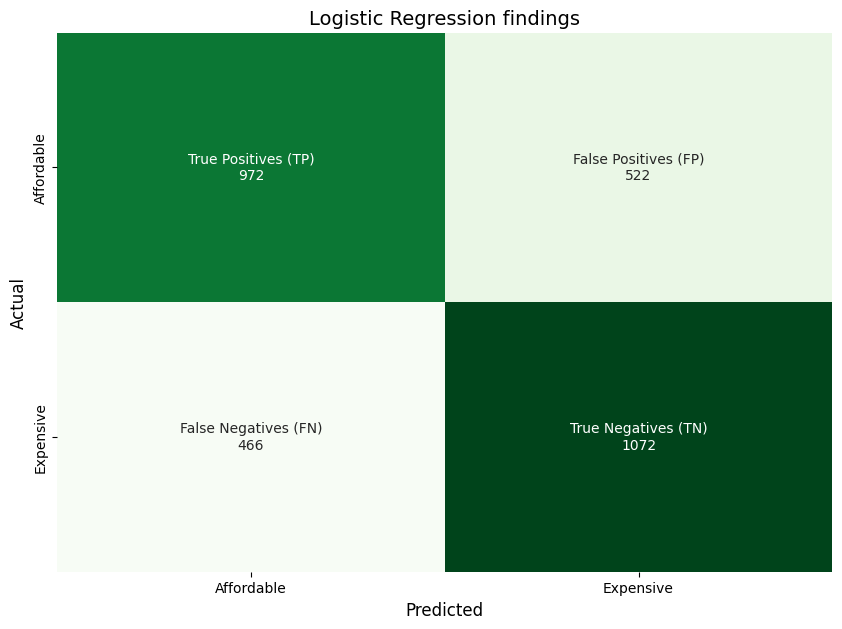

In [193]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


# Recalculate confusion matrix for adjusted plot
cm_adjusted = confusion_matrix(y_test, logistric_pred) 
cm_labels = ['Affordable', 'Expensive']

# Adjusting labels to include the numbers beneath them
labels_with_numbers = np.array([[f'True Positives (TP)\n{cm_adjusted[0, 0]}', f'False Positives (FP)\n{cm_adjusted[0, 1]}'],
                                [f'False Negatives (FN)\n{cm_adjusted[1, 0]}', f'True Negatives (TN)\n{cm_adjusted[1, 1]}']])

# Create a heatmap with annotations including labels and numbers
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cm_adjusted, annot=labels_with_numbers, fmt='', cmap='Greens', ax=ax, cbar=False)
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_xticklabels(cm_labels, fontsize=10)
ax.set_yticklabels(cm_labels, fontsize=10)
plt.title('Logistic Regression findings', fontsize=14)
plt.show()


We have chosen to use a Confusion Matrix to visualize the distribution of the models prediction.

This type of diagram is used for showing the results of our logisitic regression model, and shows the accuracy of the classification of listings as either "Affordable" or "Expensive".
Here's how to interpret the sections of this matrix:
- **True Positives (TP)**: The top left square (972) indicates the number of cases where the model correctly predicted the positive class—in this case, where it correctly identified listings as "Affordable".
- **False Positives (FP)**: The top right square (522) shows the number of cases where the model incorrectly predicted the positive class. These are listings that were actually "Expensive", but the model incorrectly labeled them as "Affordable".
- **False Negatives (FN)**: The bottom left square (466) represents the number of cases where the model incorrectly predicted the negative class. These are listings that were actually "Affordable", but the model incorrectly labeled them as "Expensive".
- **True Negatives (TN)**: The bottom right square (1072) shows the number of cases where the model correctly predicted the negative class—where it correctly identified listings as "Expensive".

### KNeighbours
In this section, we are going to be creating a model using K-Nearest Neighbours.
Firstly we are going to be finding the best parameters using `GridSearch`

In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pre_model = make_pipeline(
    preprocessor,
    KNeighborsClassifier(n_neighbors=3)
)

pre_model.fit(X_train, y_train)

param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan']
}

# Setup GridSearchCV with your model2 pipeline and the parameter grid
grid_search = GridSearchCV(pre_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluating the best model found by GridSearchCV on the test data
optimized_score = grid_search.score(X_test, y_test)

# Display the best parameters, best cross-validation score, and test score
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Optimized Score on Test Data:", optimized_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 11, 'kneighborsclassifier__weights': 'uniform'}
Best Cross-Validation Score: 0.6365726402216912
Optimized Score on Test Data: 0.6408311345646438


Based upon our ``GridSearch`` findings, we are going to make a new model and fit it using the **best** hyper parameters:
- Metric → `manhattan`
- Number of neighbors → `11`
- Weights → `uniform`

In [191]:

# - Create K-Nearest Neighbors model with the best parameters
optimized_model = make_pipeline(
    preprocessor,
    KNeighborsClassifier(n_neighbors=11,weights='uniform',metric='manhattan')
)

# * Fit the model to the training data
optimized_model.fit(X_train, y_train)

# * Predict and evaluate the model
optimized_pred = optimized_model.predict(X_test)

# * Calculate the accuracy of the model
accuracy = accuracy_score(y_test, optimized_pred)

# * Display the accuracy
display(f"Accuracy: {accuracy * 100:.2f}%")

'Accuracy: 64.08%'

By running the model on the test set, we found that it had an accuracy of `64.08%`

To visualize our findings, we have chosen to show it in a confusion matrix:

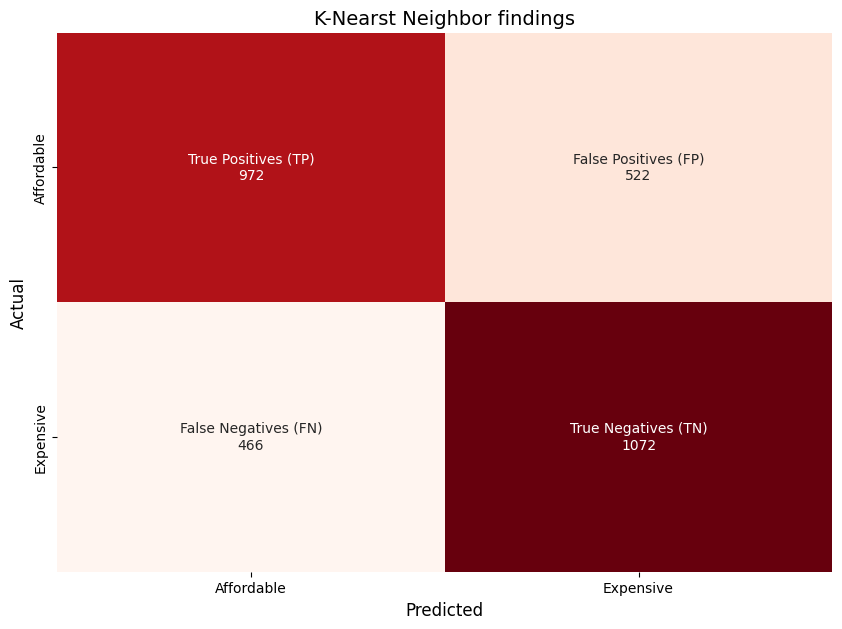

In [187]:
# Recalculate confusion matrix for adjusted plot
cm_adjusted = confusion_matrix(y_test, y_pred) 
cm_labels = ['Affordable', 'Expensive']

# Adjusting labels to include the numbers beneath them
labels_with_numbers = np.array([[f'True Positives (TP)\n{cm_adjusted[0, 0]}', f'False Positives (FP)\n{cm_adjusted[0, 1]}'],
                                [f'False Negatives (FN)\n{cm_adjusted[1, 0]}', f'True Negatives (TN)\n{cm_adjusted[1, 1]}']])

# Create a heatmap with annotations including labels and numbers
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cm_adjusted, annot=labels_with_numbers, fmt='', cmap='Reds', ax=ax, cbar=False)
ax.set_xlabel('Predicted', fontsize=12)
ax.set_ylabel('Actual', fontsize=12)
ax.set_xticklabels(cm_labels, fontsize=10)
ax.set_yticklabels(cm_labels, fontsize=10)
plt.title('K-Nearst Neighbor findings', fontsize=14)
plt.show()

We have chosen to use a Confusion Matrix to visualize the distribution of the models prediction.

This type of diagram is used for showing the results of our logisitic regression model, and shows the accuracy of the classification of listings as either "Affordable" or "Expensive".
Here's how to interpret the sections of this matrix:
- **True Positives (TP)**: The top left square (972) indicates the number of cases where the model correctly predicted the positive class—in this case, where it correctly identified listings as "Affordable".
- **False Positives (FP)**: The top right square (522) shows the number of cases where the model incorrectly predicted the positive class. These are listings that were actually "Expensive", but the model incorrectly labeled them as "Affordable".
- **False Negatives (FN)**: The bottom left square (466) represents the number of cases where the model incorrectly predicted the negative class. These are listings that were actually "Affordable", but the model incorrectly labeled them as "Expensive".
- **True Negatives (TN)**: The bottom right square (1072) shows the number of cases where the model correctly predicted the negative class—where it correctly identified listings as "Expensive".